<a href="https://colab.research.google.com/github/Jannat3226/Parkinson-disease-detection/blob/main/parkinson_s_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/hate/archive_2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# About Dataset

Use the dataset to detect Parkinson's disease.

# Objective


Develop a classical ML model to predict whether a person has Parkinsons disease or not.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
Pkns_data = pd.read_csv('/content/drive/MyDrive/hate/archive_2/pd_speech_features.csv')

# EDA(Exploratory Data Analysis)¶

In [ ]:
Pkns_data.head(10)

id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   
5   1       0  0.50780  0.78744  0.65451        226               221   
6   2       1  0.76095  0.62145  0.54543        322               321   
7   2       1  0.83671  0.62079  0.51179        318               317   
8   2       1  0.80826  0.61766  0.50447        318               317   
9   3       0  0.85302  0.62247  0.54855        493               492   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   
5          0.007631            0.002696       0.00783  ...   
6          0.005991            0.000107       0.00222  ...   
7          0.006074            0.000136       0.00282  ...   
8          0.006057            0.000069       0.00161  ...   
9          0.003910            0.000040       0.00075  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2                     1.5643                     2.3308   
3                     3.7805                     3.5664   
4                     6.1727                     5.8416   
5                     4.8025                     5.0734   
6                   117.2678                    75.3156   
7                     3.8564                    11.8909   
8                     2.2640                     6.3993   
9                     1.6796                     2.0474   

   tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
0                     3.8686                     4.2105   
1                    23.5155                    14.1962   
2                     9.4959                    10.7458   
3                     5.2558                    14.0403   
4                     6.0805                     5.7621   
5                     7.0166                     5.9966   
6                    32.0478                     7.7060   
7                     7.2891                     4.3682   
8                     4.4165                     4.2662   
9                     2.8117                     3.5070   

   tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
0                     5.1221                     4.4625   
1                    11.0261                     9.5082   
2                    11.0177                     4.8066   
3                     4.2235                     4.6857   
4                     7.7817                    11.6891   
5                     5.2065                     7.4246   
6                     3.1060                     4.6206   
7                     3.6443                     5.9610   
8                     3.6357                     3.7346   
9                     3.2727                     3.8415   

   tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
0                     2.6202                     3.0004   
1                     6.5245                     6.3431   
2                     2.9199                     3.1495   
3                     4.8460                     6.2650   
4                     8.2103                     5.0559   
5                     3.4153                     3.5046   
6                    12.8353                    13.8300   
7                    11.7552                    18.0927   
8                     2.9394       

In [ ]:
Pkns_data.describe()

id      gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   125.500000    0.515873    0.746284    0.700414    0.489058  323.972222   
std     72.793721    0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.000000    0.041551    0.543500    0.154300    2.000000   
25%     62.750000    0.000000    0.762833    0.647053    0.386537  251.000000   
50%    125.500000    1.000000    0.809655    0.700525    0.484355  317.000000   
75%    188.250000    1.000000    0.834315    0.754985    0.586515  384.250000   
max    251.000000    1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        756.000000        756.000000          756.000000    756.000000   
mean         322.678571          0.006360            0.000383      0.002324   
std           99.402499          0.001826            0.000728      0.002628   
min            1.000000          0.002107            0.000011      0.000210   
25%          250.000000          0.005003            0.000049      0.000970   
50%          316.000000          0.006048            0.000077      0.001495   
75%          383.250000          0.007528            0.000171      0.002520   
max          905.000000          0.012966            0.003483      0.027750   

       ...  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
count  ...                 756.000000                 756.000000   
mean   ...                  26.237251                  22.840337   
std    ...                  42.220693                  32.626464   
min    ...                   1.509800                   1.531700   
25%    ...                   2.408675                   3.452800   
50%    ...                   5.586300                   7.062750   
75%    ...                  28.958075                  29.830850   
max    ...                 239.788800                 203.311300   

       tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
count                 756.000000                 756.000000   
mean                   18.587888                  13.872018   
std                    25.537464                  20.046029   
min                     1.582900                   1.747200   
25%                     3.354825                   3.077450   
50%                     6.077400                   4.770850   
75%                    21.944050                  13.188000   
max                   121.542900                 102.207000   

       tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
count                 756.000000                 756.000000   
mean                   12.218953                  12.375335   
std                    17.783642                  16.341665   
min                     1.789500                   1.628700   
25%                     2.937025                   3.114375   
50%                     4.300450                   4.741450   
75%                    10.876150                  12.201325   
max                    85.571700                  73.532200   

       tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
count                 756.000000                 756.000000   
mean                   14.799230                  14.751559   
std                    15.722502                  14.432979   
min                     1.861700                   1.955900   
25%                     3.665925                   3.741275   
50%                     6.725700                   7.334250   
75%                    21.922050                  22.495175   
max                    62.007300                  57.544300   

       tqwt_kurtosisValue_dec_36       class  
count                 756.000000  756.000000  
mean                   31.481110    0.746032  
std                    34.230991    0.435568  
min                     2.364000    0.000000  
25%                  

In [ ]:
Pkns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
print(f"Number of rows- {Pkns_data.shape[0]}")
print(f"Number of columns- {Pkns_data.shape[1]}")

Number of rows- 756
Number of columns- 755


In [ ]:
Pkns_data.shape

(756, 755)

In [ ]:
Pkns_data.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [ ]:
pd.crosstab(Pkns_data["class"], Pkns_data["gender"])

gender    0    1
class           
0       123   69
1       243  321

<ipython-input-12-4eedb994dc38>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Pkns_data["gender"], color = "Green");


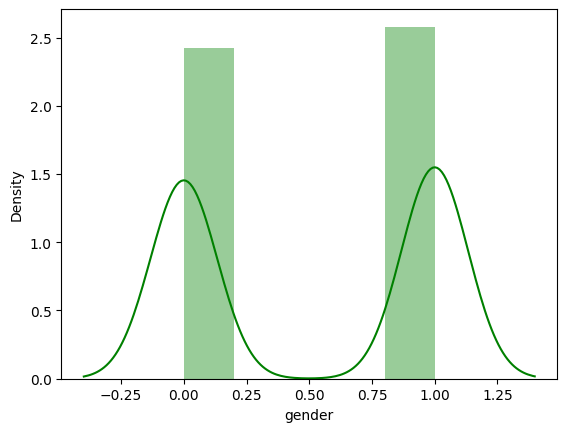

In [ ]:
sns.distplot(Pkns_data["gender"], color = "Green");

In [ ]:
import plotly.express as px
condition = ["No Parkinson's"," have Parkinson's"]

have_or_not = Pkns_data["class"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = Pkns_data["class"].value_counts(), names = condition, width = 700, height = 500, color_discrete_sequence = ["skyblue", "violet"], title = "Percentage whether patient has Parkinson's or not")
fig.show()

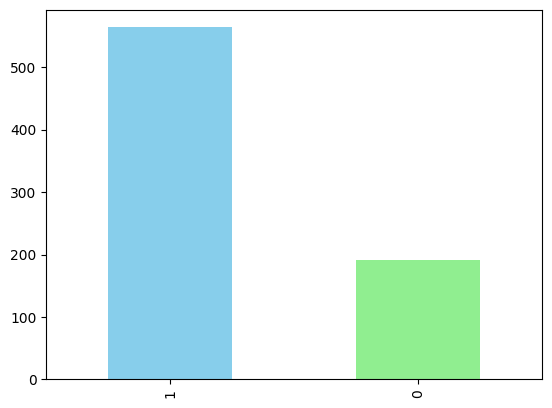

In [ ]:
Pkns_data["class"].value_counts().plot(kind = "bar", color = ["skyblue", "lightgreen"]);

<ipython-input-15-557d3a77a36e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




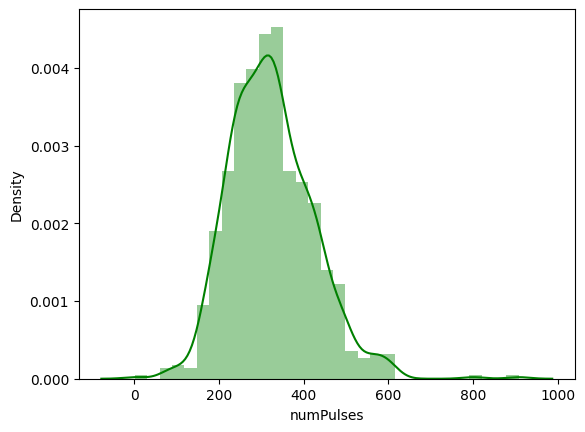

In [ ]:
sns.distplot(Pkns_data["numPulses"], color = "green");

In [ ]:
sns.histplot(Pkns_data["numPeriodsPulses"], color = "lightgreen");

<ipython-input-17-a6cd8e905be5>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




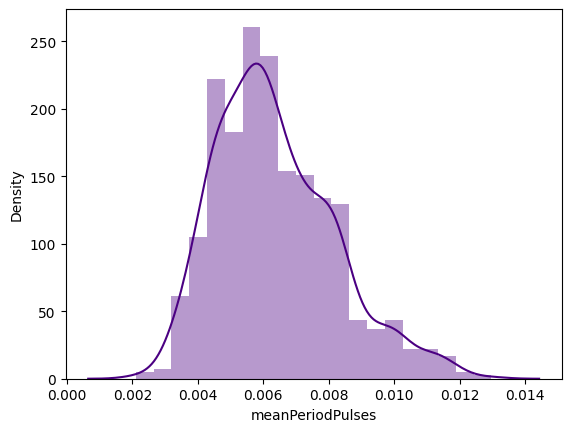

In [ ]:
sns.distplot(Pkns_data["meanPeriodPulses"], color = "indigo");

1 = Male

0 = Female

In [ ]:
Pkns_data.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


<Axes: >

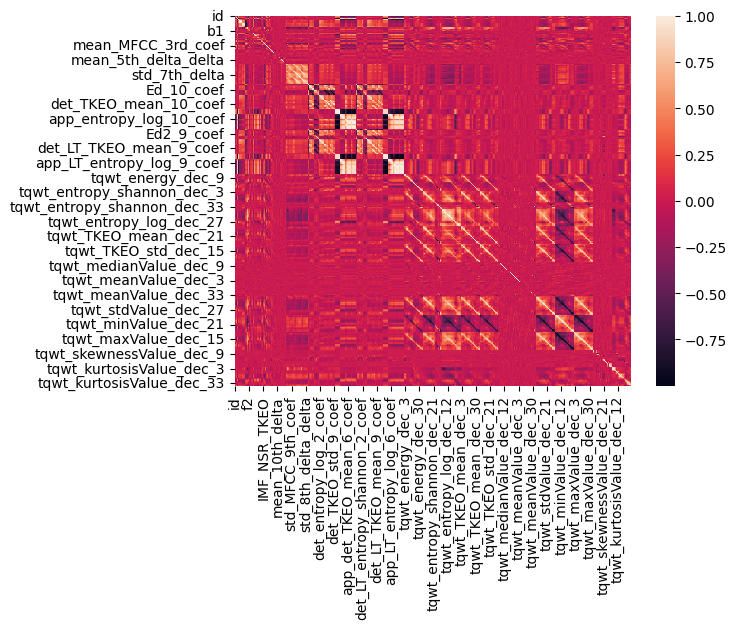

In [ ]:
Pkns_data.info()
sns.heatmap(Pkns_data.corr())


The data will have to be normalised.

No missing data.

# Analyse the target 'status'

This is a binary classification problem due to to classes in the target,status.

# Check correlation between columns

In [ ]:
print(Pkns_data.corr()['class'].abs().sort_values(ascending=False))

class                       1.000000
mean_MFCC_2nd_coef          0.398695
tqwt_minValue_dec_12        0.395740
tqwt_stdValue_dec_12        0.393029
tqwt_maxValue_dec_12        0.391288
                              ...   
tqwt_energy_dec_30          0.000897
tqwt_skewnessValue_dec_5    0.000783
tqwt_energy_dec_23          0.000463
tqwt_energy_dec_19          0.000343
det_LT_TKEO_mean_1_coef     0.000044
Name: class, Length: 755, dtype: float64


It can be seen that many of the features are moderately correlated with the target, 'status'. The features are therefore important factors influencing the target.

- Healthy = 0
- Parkinson's disease = 1

# Data Visualisation with Seaborn

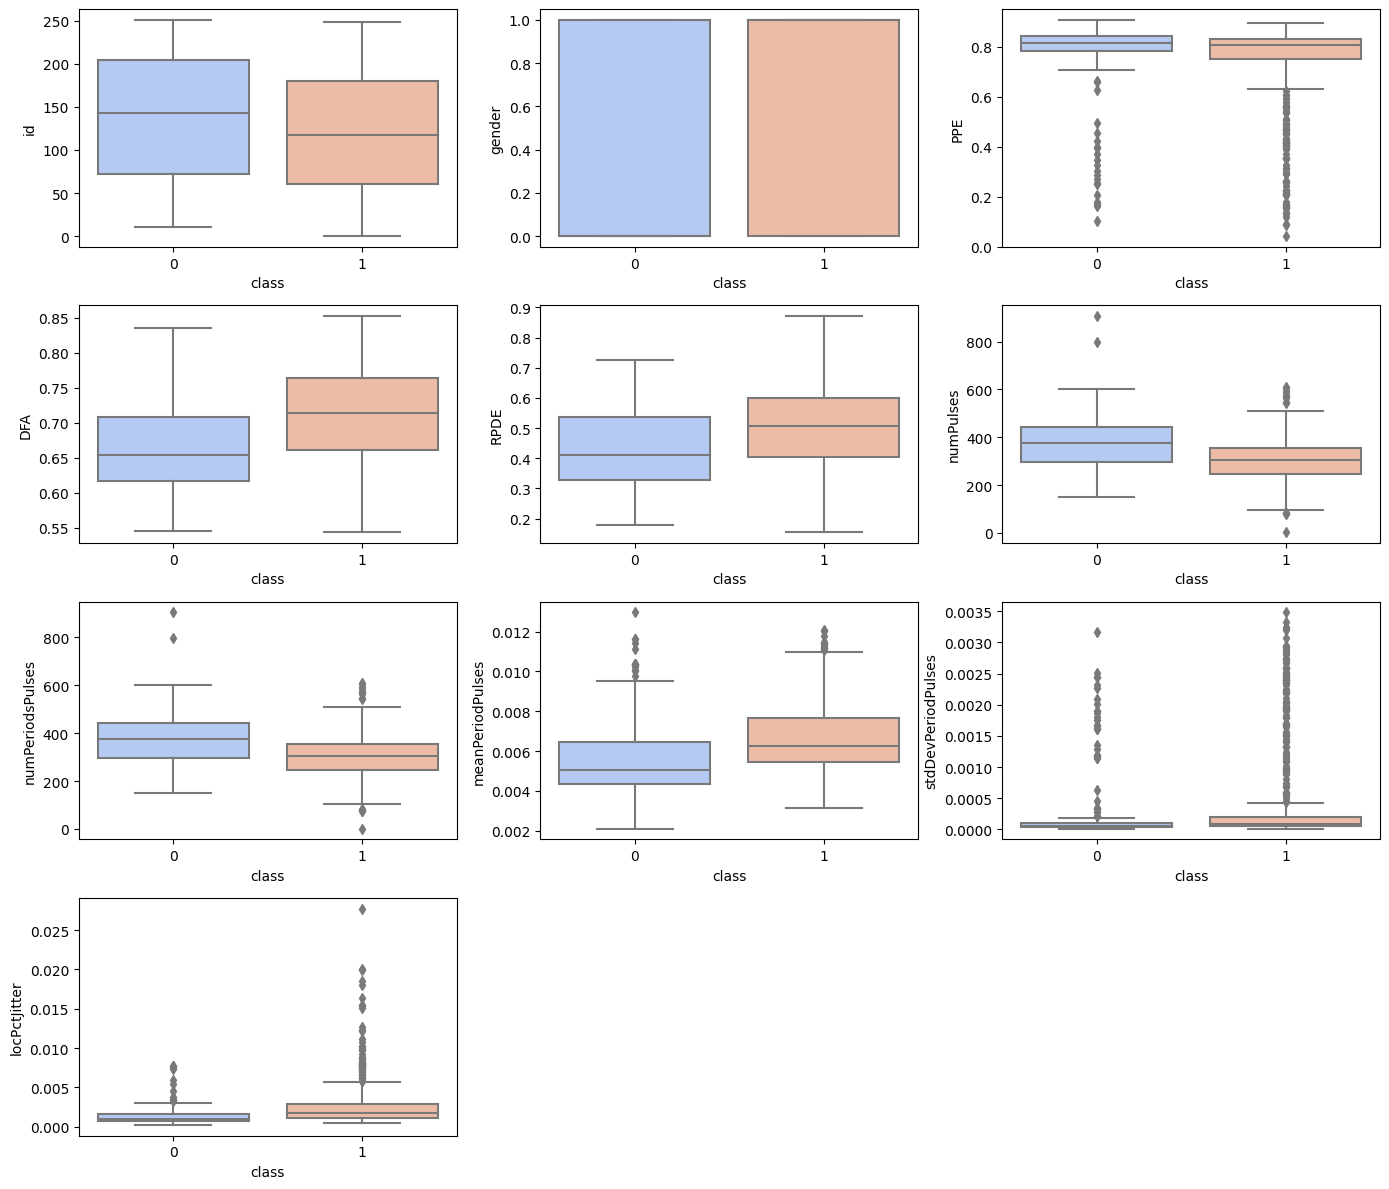

In [ ]:
plt.figure(figsize=(14,12))
cols = ['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ]
cnt=1
for col in cols :
        #plt.figure(figsize=(5,5))
        plt.subplot(4,3,cnt)
        sns.boxplot(x='class',y=col,data=Pkns_data, palette='coolwarm')
        cnt= cnt+1
plt.tight_layout()
plt.show()

* MDVP:Fo(Hz), MDVP:Fhi(Hz), and MDVP:Flo(Hz) is lower in people with Parkinsons disease.
* MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3,
   and Shimmer:APQ5 are higher in people with Parkinsons disease.       

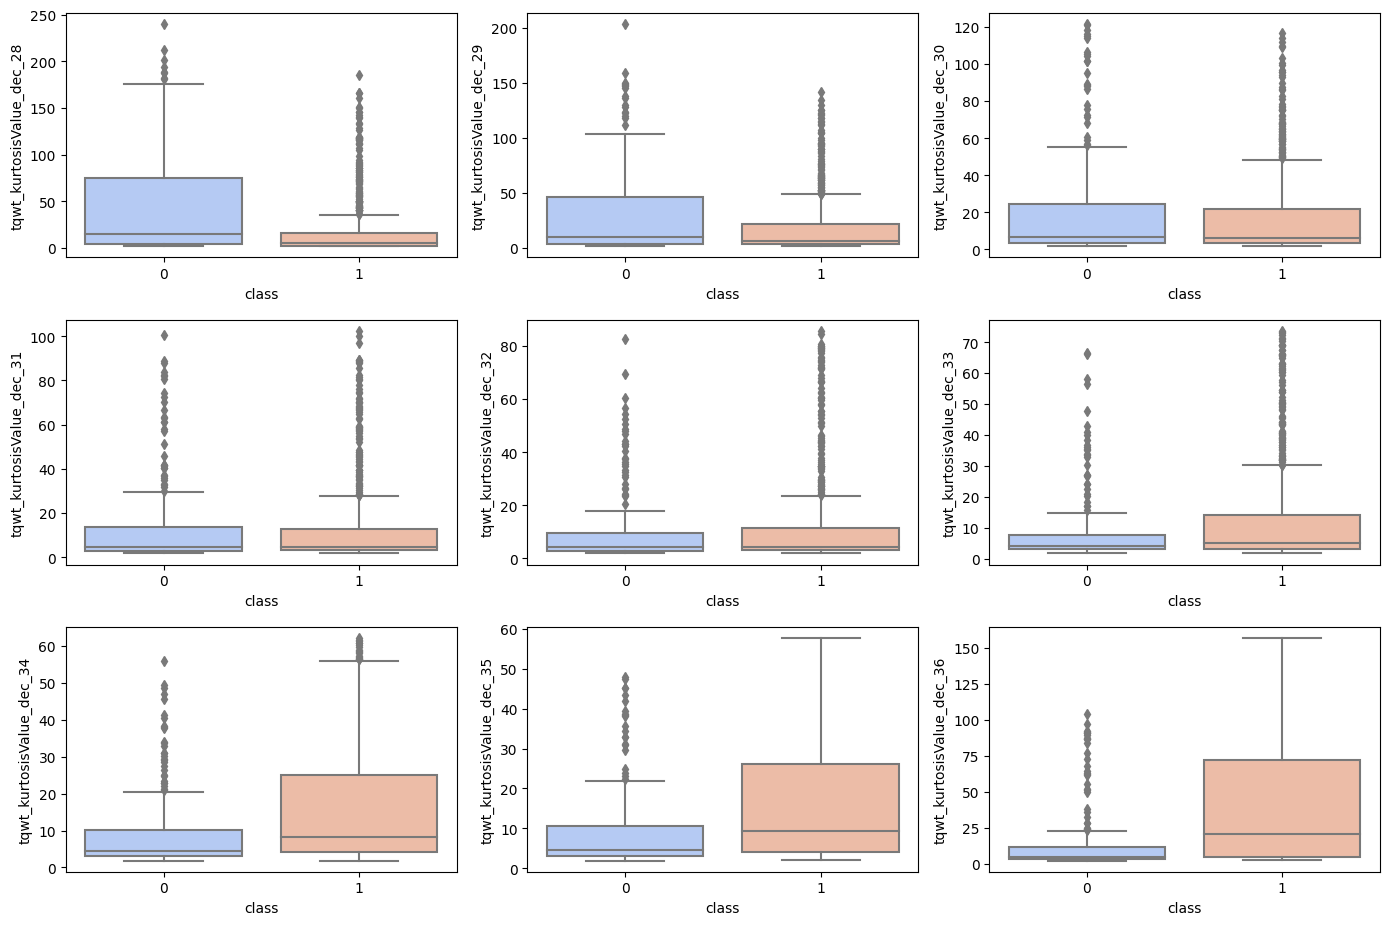

In [ ]:
plt.figure(figsize=(14,12))
cols = ['tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36',      ]
cnt=1
for col in cols :
        #plt.figure(figsize=(5,5))
        plt.subplot(4,3,cnt)
        sns.boxplot(x='class',y=col,data=Pkns_data, palette='coolwarm')
        cnt= cnt+1
plt.tight_layout()
plt.show()

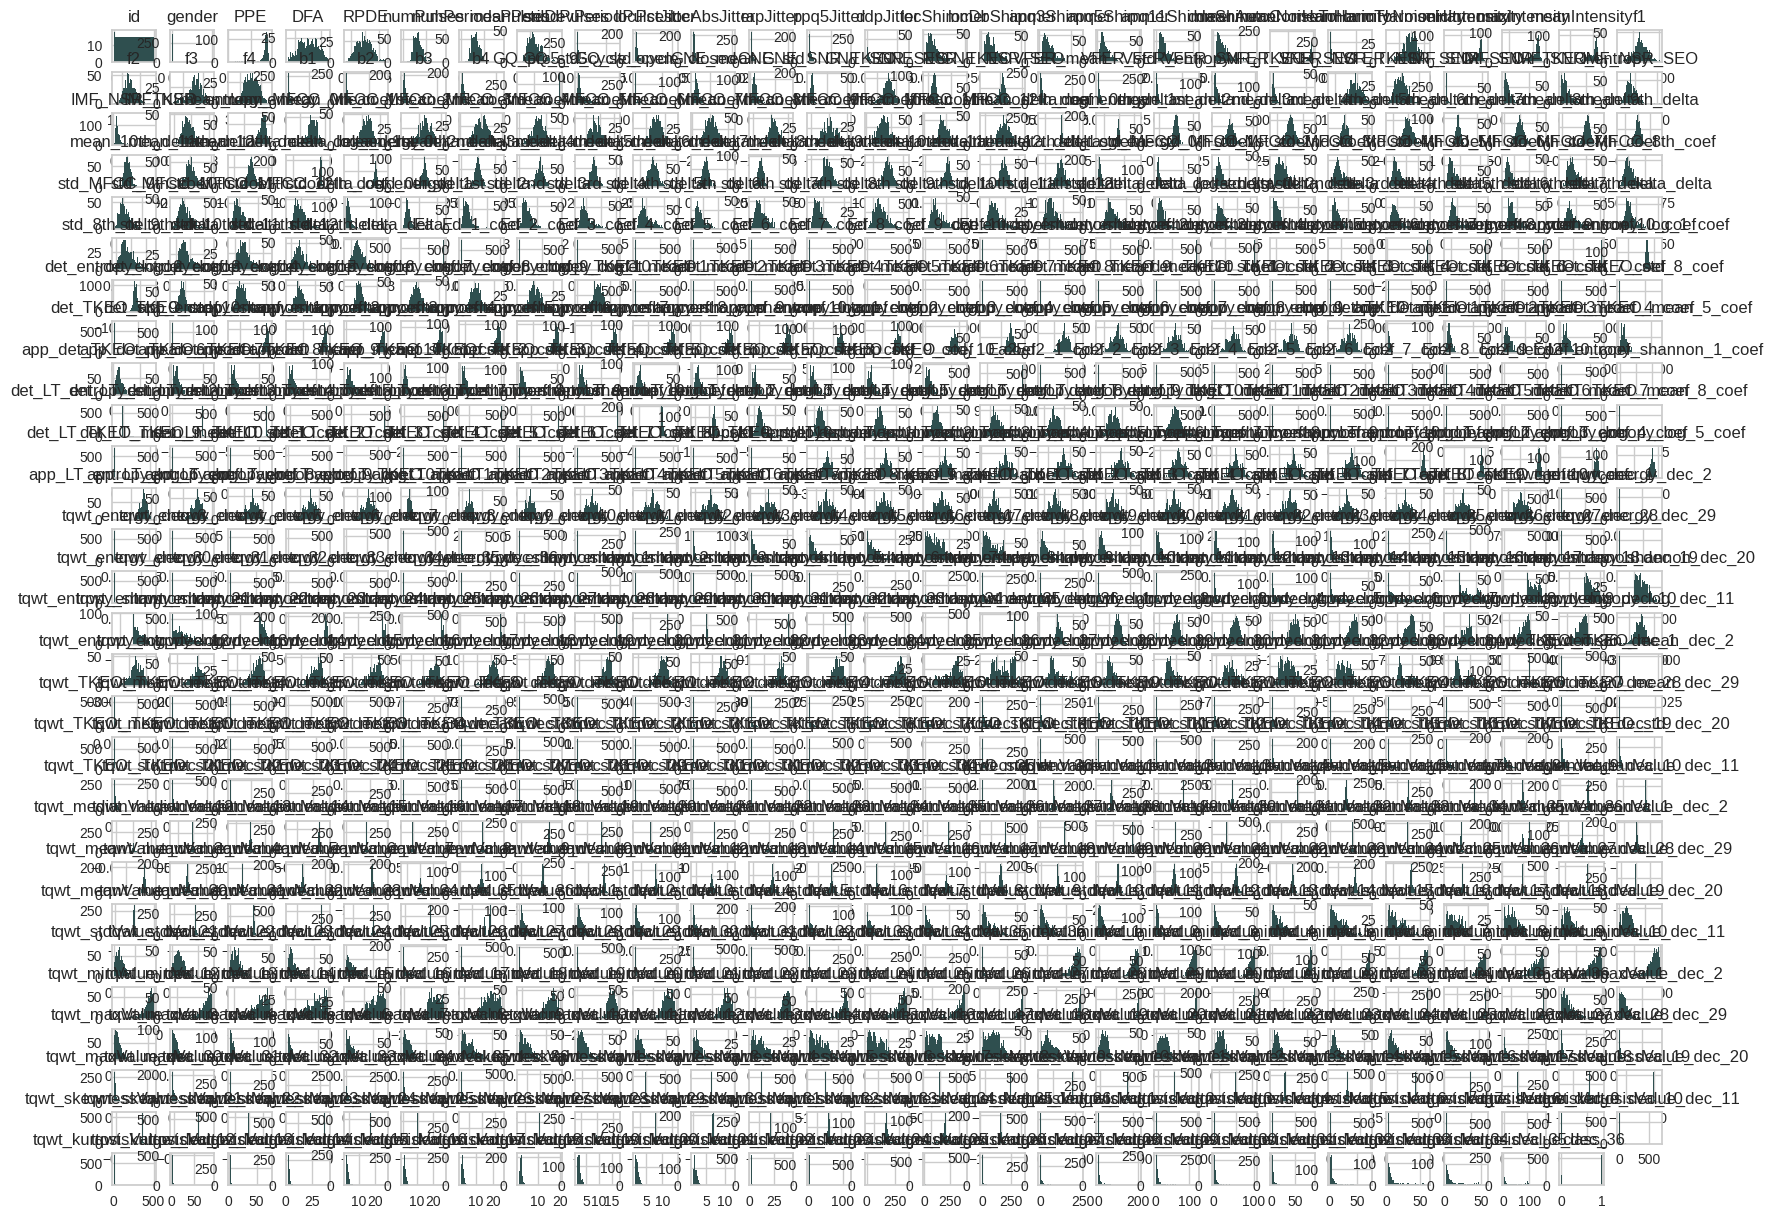

In [ ]:
Pkns_data.hist(bins=50, figsize =(20,15), color = 'darkslategrey')
plt.show(block=False)

# Set Up Features and Target

In [ ]:
X = Pkns_data.drop(columns=["class"], axis=1)
y = Pkns_data["class"]

In [ ]:
X

id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0      0       1  0.85247  0.71826  0.57227        240               239   
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
..   ...     ...      ...      ...      ...        ...               ...   
751  250       0  0.80903  0.56355  0.28385        417               416   
752  250       0  0.16084  0.56499  0.59194        415               413   
753  251       0  0.88389  0.72335  0.46815        381               380   
754  251       0  0.83782  0.74890  0.49823        340               339   
755  251       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0            0.008064            0.000087       0.00218  ...   
1            0.008258            0.000073       0.00195  ...   
2            0.008340            0.000060       0.00176  ...   
3            0.010858            0.000183       0.00419  ...   
4            0.008162            0.002669       0.00535  ...   
..                ...                 ...           ...  ...   
751          0.004627            0.000052       0.00064  ...   
752          0.004550            0.000220       0.00143  ...   
753          0.005069            0.000103       0.00076  ...   
754          0.005679            0.000055       0.00092  ...   
755          0.005676            0.000037       0.00078  ...   

     tqwt_kurtosisValue_dec_27  tqwt_kurtosisValue_dec_28  \
0                       1.5466                     1.5620   
1                       1.5530                     1.5589   
2                       1.5399                     1.5643   
3                       6.9761                     3.7805   
4                       7.8832                     6.1727   
..                         ...                        ...   
751                     3.4394                     3.0706   
752                    19.6733                     1.9704   
753                   137.3126                    51.5607   
754                     5.4425                    19.1607   
755                    11.1487                    62.9927   

     tqwt_kurtosisValue_dec_29  tqwt_kurtosisValue_dec_30  \
0                       2.6445                     3.8686   
1                       3.6107                    23.5155   
2                       2.3308                     9.4959   
3                       3.5664                     5.2558   
4                       5.8416                     6.0805   
..                         ...                        ...   
751                     3.0190                     3.1212   
752                     1.7451                     1.8277   
753                    44.4641                    26.1586   
754                    12.8312                     8.9434   
755                    21.8152                     9.2457   

     tqwt_kurtosisValue_dec_31  tqwt_kurtosisValue_dec_32  \
0                       4.2105                     5.1221   
1                      14.1962                    11.0261   
2                      10.7458                    11.0177   
3                      14.0403                     4.2235   
4                       5.7621                     7.7817   
..                         ...                        ...   
751                     2.4921                     3.5844   
752                     2.4976                     5.2981   
753                     6.3076                     2.8601   
754                     2.2044                     1.9496   
755                     4.8555                     3.0551   

     tqwt_kurtosisValue_dec_33  tqwt_kurtosisValue_dec_34  \
0                       4.4625                     2.6202   
1  

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
751    0
752    0
753    0
754    0
755    0
Name: class, Length: 756, dtype: int64

In [ ]:
# Get the features and labels
X = Pkns_data.loc[:,Pkns_data.columns!='class'].values[:,1:] #drops the name column because only values wanted
y = Pkns_data.loc[:,'class'].values

In [ ]:
X

array([[ 1.     ,  0.85247,  0.71826, ...,  2.6202 ,  3.0004 , 18.9405 ],
       [ 1.     ,  0.76686,  0.69481, ...,  6.5245 ,  6.3431 , 45.178  ],
       [ 1.     ,  0.85083,  0.67604, ...,  2.9199 ,  3.1495 ,  4.7666 ],
       ...,
       [ 0.     ,  0.88389,  0.72335, ...,  3.5377 ,  3.3545 ,  5.0424 ],
       [ 0.     ,  0.83782,  0.7489 , ...,  2.6801 ,  2.8332 ,  3.7131 ],
       [ 0.     ,  0.81304,  0.76471, ...,  4.0116 ,  2.6217 ,  3.1527 ]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Normalize Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X)

print(f"Normlized Features its max : \n{X.max()} \n\nits min : \n{Pkns_data.min()}" )

Normlized Features its max : 
1.0000000000000018 

its min : 
id                           0.000000
gender                       0.000000
PPE                          0.041551
DFA                          0.543500
RPDE                         0.154300
                               ...   
tqwt_kurtosisValue_dec_33    1.628700
tqwt_kurtosisValue_dec_34    1.861700
tqwt_kurtosisValue_dec_35    1.955900
tqwt_kurtosisValue_dec_36    2.364000
class                        0.000000
Length: 755, dtype: float64


# Split the data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(529, 754)
(227, 754)
(529,)
(227,)


# data standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X)

print(f"Normlized Features its max : \n{X.max()} \n\nits min : \n{Pkns_data.min()}" )

Normlized Features its max : 
1.0000000000000018 

its min : 
id                           0.000000
gender                       0.000000
PPE                          0.041551
DFA                          0.543500
RPDE                         0.154300
                               ...   
tqwt_kurtosisValue_dec_33    1.628700
tqwt_kurtosisValue_dec_34    1.861700
tqwt_kurtosisValue_dec_35    1.955900
tqwt_kurtosisValue_dec_36    2.364000
class                        0.000000
Length: 755, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
sc.fit(X_train)

StandardScaler()

In [ ]:
#fitting our training and test set into the object sc
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 1.54344042 -1.00189215  0.25022895 ... -0.34833905 -0.53315977
  -0.7783691 ]
 [ 0.11268475 -1.00189215  0.25235677 ...  0.50190849  0.30544083
  -0.2189285 ]
 [-1.44188631  0.99811142  0.65688698 ... -0.71922323 -0.58775182
  -0.07820025]
 ...
 [ 0.55291726  0.99811142  0.4543787  ...  0.49961605  0.03418317
   0.76698146]
 [ 0.70424719 -1.00189215  0.60946685 ...  2.08487399  2.06691646
   1.63434923]
 [-0.93286747  0.99811142  0.24876987 ...  1.05632545  1.14453375
   1.1729676 ]]


In [ ]:
print(X_test)

[[ 4.38984216e-02  9.98111424e-01  4.38936758e-01 ...  1.70935435e-02
   1.39648980e-03  4.19346845e-01]
 [ 5.25402732e-01 -1.00189215e+00  2.97649080e-01 ...  9.72579432e-01
   1.55750236e+00  1.30365874e+00]
 [ 1.28205236e+00  9.98111424e-01  3.21602326e-01 ...  2.78208717e-02
   8.54657831e-02 -2.73613279e-01]
 ...
 [ 7.14129537e-02  9.98111424e-01  5.07574361e-01 ... -5.50569283e-01
  -3.05232497e-01 -6.80199896e-01]
 [ 7.86790787e-01 -1.00189215e+00  5.98645334e-01 ... -6.47724459e-01
  -8.16971414e-01 -8.29700449e-01]
 [ 1.62598401e+00  9.98111424e-01  5.27150364e-01 ... -7.83367379e-01
  -8.47679441e-01 -8.02841057e-01]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.99)
X_PCA=pca.fit_transform(X)

print(X.shape)
print(X_PCA.shape)

(756, 754)
(756, 225)


# MODELLING

In [ ]:
 # of one person in train and test set
    fold = StratifiedGroupKFold(5, shuffle=True, random_state=RANDOM_STATE)

    for train_index, test_index in fold.split(X, y, groups=X['id']):
        X_train, X_test = X.iloc[train_index].drop(columns='id'), X.iloc[test_index].drop(columns='id')
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # transformations before training
        if scaling:
            scaling.fit(X_train)
            X_train = scaling.transform(X_train)
            X_test = scaling.transform(X_test)
        if upsampling:
            X_train, y_train = upsample(X_train, y_train)
        if resampling:
            X_train, y_train = resample_gender(X_train, y_train)
        if pca:
            X_train, X_test = perform_pca(X_train, X_test, explained_variance=pca)

        estimator.fit(X_train, y_train)

        predictions = estimator.predict(X_test)


# 1. A Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 10000)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1])

In [ ]:
X_train_pred = rf.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_pred)

In [ ]:
print("Accuracy score of training data:", training_data_accuracy)

Accuracy score of training data: 1.0


In [ ]:
X_test_pred = rf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_pred)

In [ ]:
print("Accuracy score of test data:", test_data_accuracy)

Accuracy score of test data: 0.8325991189427313


In [ ]:
from sklearn.metrics import accuracy_score

score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(score_rf)+" %")

The accuracy score achieved using the Random Forest model is: 83.26 %


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

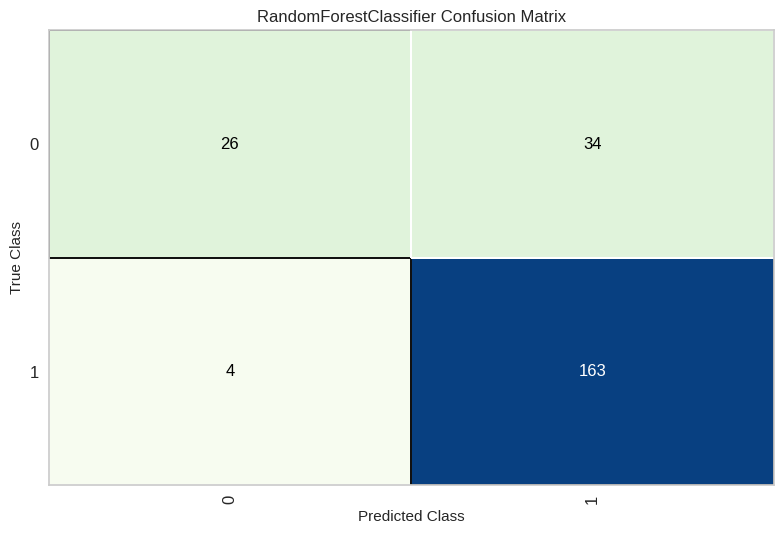

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
rf_cm = ConfusionMatrix(rf, cmap='GnBu')

rf_cm.fit(X_train, y_train)
rf_cm.score(X_test, y_test)
rf_cm.show()

# Classification Report

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.43      0.58        60
           1       0.83      0.98      0.90       167

    accuracy                           0.83       227
   macro avg       0.85      0.70      0.74       227
weighted avg       0.84      0.83      0.81       227



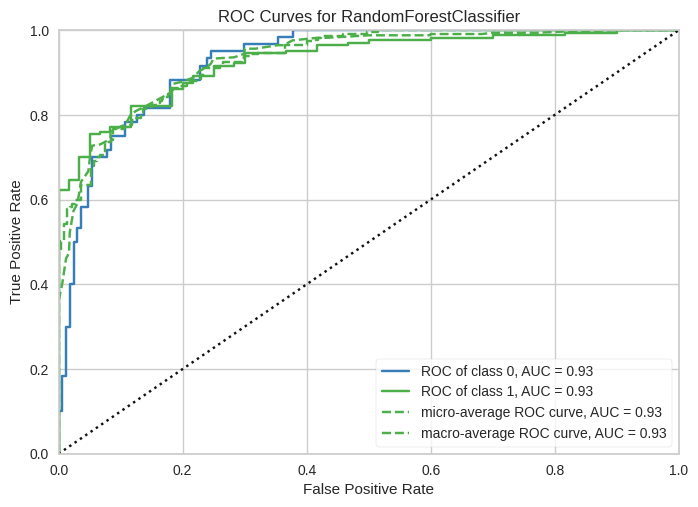

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(rf)

set_palette('bold')

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [ ]:
input_data=(125,0,0.8426,0.75185,0.31383,414,413,0.004660391,3.68E-05,0.00065,3.05E-06,0.0001,0.00024,0.00029,0.02742,0.24,0.01604,0.01655,0.01966,0.04811,0.994421,0.00565,23.573,77.81244104,80.12721637,78.65296477,630.07445,1395.912461,2139.624306,2958.681748,191.8844068,481.9816548,1181.83711,161.6258941,1,9.4927,0,1.3028,0.29138,0.12686,1486194.992,1.6064,3.0846,0.00056239,0.00040221,1.6938,11.2066,33.5093,1.1648,1.1699,17.6402,1.4096,8.8029,0.25641,12.0748,0.20805,10.226,15.9571,6.8491,0.095697,-1.3122,-0.996,-0.2278,-0.40107,-2.0427,-0.85564,0.52571,-0.94194,-0.46815,-0.37681,-0.0010002,-0.0046877,0.0081058,-0.004515,0.0063603,-0.012953,-0.010692,0.0051346,-0.00019223,0.00026054,0.0019461,-0.00068613,-0.004925,0.0050508,-6.82E-05,-0.00066677,0.00010961,0.00078871,-0.00017056,-0.0001512,0.00046744,0.00020714,0.00032971,-9.93E-05,0.00012139,0.00030236,-0.00016676,9.53E-05,0.12776,0.51127,0.34481,0.48798,0.6111,0.59443,0.73339,0.63751,0.39192,0.2598,0.41698,0.23209,0.40972,0.46614,0.01387,0.076786,0.036575,0.060379,0.052333,0.044817,0.039793,0.045301,0.045518,0.03619,0.044008,0.035347,0.034222,0.027815,0.0047157,0.028975,0.016893,0.022657,0.019847,0.016069,0.016195,0.018074,0.015688,0.014199,0.015859,0.015696,0.013866,0.012683,99.9991,2.24E-07,9.34E-07,5.44E-06,2.21E-05,2.86E-05,2.93E-05,3.62E-05,0.00019808,0.00014523,0.00042925,4.7201,7.312,-35.3592,-438.0248,-740.0665,-746.1043,-984.0158,-8206.6848,-5787.0171,-19999.2443,-631.6244,-250.8264,-61.0872,13.1197,-9.6658,10.4815,20.9134,36.652,34.1461,52.2272,0.012283,0.14818,1.0519,3.8477,10.8728,9.5891,10.6882,146.1221,65.4208,224.5183,0.02944,0.27268,1.5284,11.5359,21.607,24.5155,31.3473,216.218,146.4142,344.551,-114437758.1,-137713745.7,-182509448,-265201106.6,-431822625.7,-773687470,-1526373765,-2994293376,-6242919737,-12994481449,1235.1332,740.1492,487.6338,351.8459,284.6415,253.809,249.9934,244.7919,255.1892,265.5865,1753.1956,6208.9218,19950.5559,58286.357,151368.6182,355954.3935,755540.8563,1609034.295,3219148.972,6445075.739,12817.252,34018.9117,85718.3264,206600.409,467055.1812,1006457.516,2053677.666,4238825.04,8508394.125,17010951.06,100,7.84E-09,3.28E-08,1.94E-07,7.89E-07,1.02E-06,1.04E-06,1.27E-06,7.01E-06,5.08E-06,1.50E-05,0.00047739,0.001732,0.008534,0.028242,0.032917,0.03372,0.039795,0.1593,0.12069,0.29471,-1792.0444,-900.0526,-469.2773,-266.3699,-224.8473,-172.2732,-151.3172,-124.7213,-127.2775,-109.2,2.61E-07,3.16E-06,2.29E-05,8.32E-05,0.00023608,0.00020673,0.000228,0.0031453,0.0013904,0.0047579,6.14E-07,5.69E-06,3.29E-05,0.00025037,0.000471,0.0005328,0.00067085,0.0046653,0.0031122,0.0073029,-25275.7435,-33462.7286,-47836.2966,-73905.9197,-126713.7292,-237502.5933,-488389.1859,-993303.2576,-2141097.23,-4591175.542,437.9842,289.7076,206.8536,159.5867,136.6457,127.9473,131.5158,133.6981,144.0953,154.4925,1.0729,3.7992,12.1995,35.658,92.6914,218.0726,463.3076,988.0699,1976.2629,3953.3201,7.8469,20.8082,52.4451,126.0469,285.4312,615.7921,1264.6629,2606.6105,5216.7698,10432.9015,5.95E-05,2.49E-05,4.42E-05,0.00013494,0.00026658,0.0001938,0.00013005,0.00040218,0.0018853,0.0056992,0.0075213,0.009289,0.013729,0.011261,0.017112,0.048713,0.10016,0.13762,0.05295,0.035948,0.017479,0.023962,0.15217,0.27968,0.081774,0.00045929,6.36E-05,3.96E-05,3.51E-05,3.39E-05,3.84E-05,5.07E-05,3.29E-05,2.38E-05,3.27E-05,0.00099181,3.4952,1.5903,2.6907,7.0657,12.4516,9.0749,6.7395,18.2995,68.5401,168.4518,198.1892,238.6923,313.4664,252.2274,341.7267,686.77,990.8622,1149.1823,593.731,482.998,282.2894,317.5738,444.0508,-306.5677,369.5164,11.4333,1.3073,0.97678,1.0022,1.0717,1.2923,1.6722,1.1167,0.82457,1.0683,17.4018,-1762417.983,-1505854.052,-1176318.539,-912886.3939,-723102.5102,-612355.7001,-493862.9398,-365127.6979,-258546.1103,-187286.6973,-150435.8249,-112145.2651,-86829.4934,-72858.1187,-53807.6485,-35445.1603,-22553.3323,-14785.8641,-17214.0969,-13919.3667,-13155.2746,-10050.1769,-3890.9936,-1749.3666,-2859.5144,-9237.1968,-12026.4642,-9777.1894,-7622.0788,-5926.1007,-4629.0229,-3632.4936,-3125.5111,-2657.5157,-2127.6248,-1582.4487,4.50E-06,1.95E-06,3.68E-06,1.40E-05,4.41E-05,3.76E-05,2.20E-05,7.73E-05,0.00040571,0.0021426,0.0034126,0.0045921,0.0096202,0.0085419,0.012276,0.04963,0.12246,0.2634,0.088176,0.096614,0.049977,0.02699,0.50297,1.6198,0.43733,0.0012349,0.00048834,0.00035892,0.00039535,0.00046586,0.00059496,0.0011547,0.00079325,0.00065873,0.0010925,0.024971,1.37E-05,4.91E-06,6.88E-06,3.12E-05,0.00011973,0.00011788,4.10E-05,0.00010486,0.00061739,0.002866,0.005782,0.0069543,0.011825,0.013272,0.018575,0.045455,0.11938,0.11274,0.09591,0.040799,0.026196,0.026944,0.2669,0.75406,0.18201,0.012069,0.004752,0.0030091,0.0024069,0.0020076,0.001662,0.0017094,0.0014671,0.0011483,0.0015753,0.025536,-1.03E-06,2.02E-06,-2.43E-06,-6.74E-06,-7.18E-06,-1.21E-05,-8.31E-07,1.79E-05,5.29E-05,1.17E-05,0.00015084,-9.53E-05,0.00014392,-0.00029695,0.0010987,-0.0005874,-0.00035735,-0.00075811,0.00036601,0.00012607,0.0012352,-0.00036961,4.20E-05,0.01185,0.0020839,-0.00014078,-6.56E-05,0.00016458,-0.00020136,9.99E-05,-0.00084028,-9.58E-05,0.00093245,-0.00043606,-0.0010428,0.00084357,4.07E-21,-2.66E-21,-6.80E-21,-2.85E-21,-2.69E-21,-8.66E-21,-4.32E-21,-2.75E-21,3.62E-20,4.50E-20,1.55E-19,2.41E-19,8.84E-20,-3.99E-19,-7.15E-19,-2.73E-19,8.34E-19,2.11E-18,-1.13E-18,-1.21E-19,-6.69E-19,3.26E-19,-4.67E-18,-6.88E-19,-1.80E-18,-1.35E-19,1.35E-19,8.11E-20,-3.89E-20,2.34E-19,-1.40E-19,1.18E-19,4.03E-19,1.94E-19,3.50E-19,0.0011608,0.0016212,0.0011491,0.0016761,0.0032099,0.0049424,0.0046162,0.0041425,0.00798,0.018927,0.036048,0.045363,0.055226,0.073548,0.072968,0.098532,0.18213,0.2861,0.36736,0.24959,0.22534,0.17209,0.22076,0.60943,0.90486,0.53602,0.044032,0.017941,0.015506,0.016,0.017243,0.020072,0.025313,0.022315,0.02085,0.02679,0.13173,-0.030331,-0.01709,-0.018739,-0.027714,-0.045434,-0.040958,-0.022762,-0.042491,-0.1012,-0.16716,-0.23691,-0.29974,-0.33272,-0.39178,-0.40543,-0.56693,-0.82533,-0.84839,-0.7181,-0.56625,-0.44531,-0.52972,-1.3967,-1.8791,-0.96472,-0.46528,-0.15845,-0.12427,-0.11567,-0.16339,-0.089372,-0.10277,-0.082349,-0.058909,-0.070593,-0.32072,0.047082,0.023373,0.020779,0.030439,0.043842,0.040176,0.025024,0.04662,0.097373,0.16755,0.22255,0.2975,0.33136,0.3943,0.39475,0.5618,0.80987,0.85866,0.67871,0.64994,0.4591,0.55408,1.3691,1.8813,1.0347,0.43572,0.27425,0.2142,0.18585,0.16347,0.14272,0.12337,0.11033,0.096142,0.096629,0.37911,0.16193,0.088175,0.012188,0.041711,0.0034585,0.024436,0.011993,-0.012958,0.062245,0.0040887,0.0068986,0.0042609,-0.0033055,0.012171,-0.0031007,-0.0015573,0.00084227,0.00012086,0.0042871,0.0015029,0.0017217,-0.0025488,1.99E-06,-0.00013362,0.051856,-0.29113,4.6314,4.4673,2.9474,0.02519,1.0151,0.30639,0.31456,0.32401,0.39796,0.13671,17.465,9.7595,5.8648,9.5994,12.7424,14.4608,4.8377,4.1227,4.336,4.2329,5.3308,4.1552,3.622,4.6137,3.6228,2.7607,2.4423,1.7885,2.4526,1.7796,1.8438,2.0179,1.8853,1.8229,1.7565,26.2914,124.0581,97.7638,60.7828,34.0243,13.5261,5.7852,6.2358,5.501,4.1432,2.7032)
# changing input data to numpy array
input_data_numpy = np.asarray(input_data)

#reshaping the numpy array
input_data_reshape = input_data_numpy.reshape(1,-1)

#standardizing the input data
std_data = scaler.transform(input_data_reshape)

## prediction
prediction = rf.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The patient has Parkinson')
elif (prediction[0] == 0):
  print('The patient does not have Parkinson')
else:
  print('Some error in processing')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



[1]
The patient has Parkinson


# 2. A Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=38)

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1])

In [ ]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using the Decision Tree model is: "+str(score_dt)+" %")

The accuracy score achieved using the Decision Tree model is: 77.09 %


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        60
           1       0.88      0.80      0.84       167

    accuracy                           0.77       227
   macro avg       0.72      0.75      0.73       227
weighted avg       0.79      0.77      0.78       227



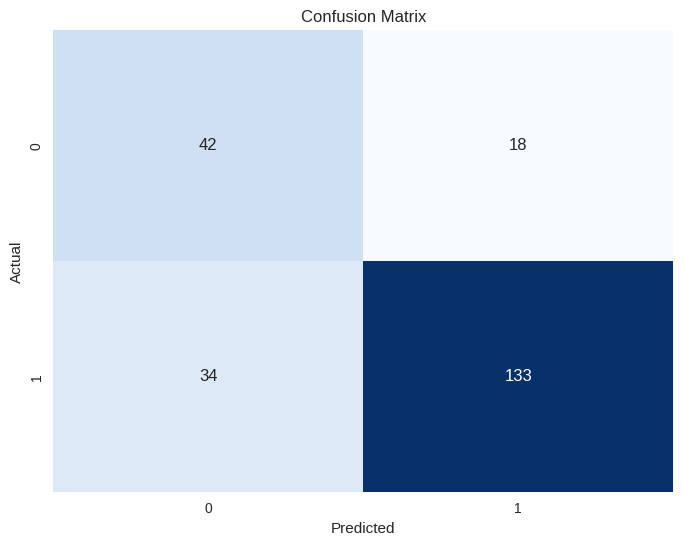

In [ ]:
dt_cr = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(dt_cr)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

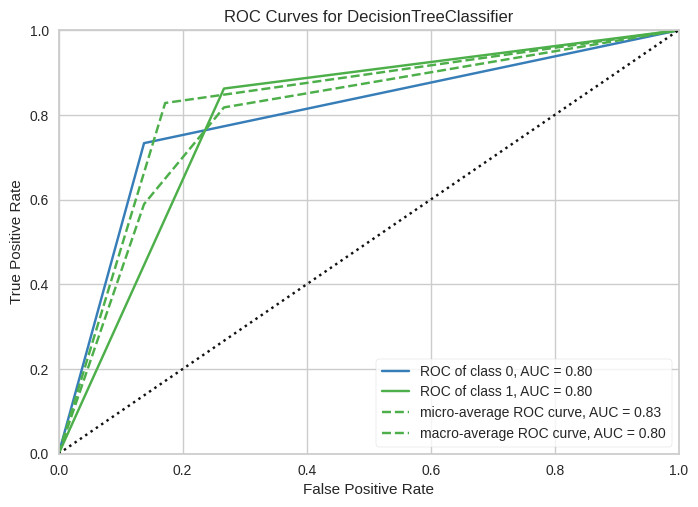

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(dt)

set_palette('bold')

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

# 3. A Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1])

In [ ]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(score_lr)+" %")

The accuracy score achieved using the Logistic Regression model is: 87.67 %


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        60
           1       0.92      0.91      0.92       167

    accuracy                           0.88       227
   macro avg       0.84      0.85      0.84       227
weighted avg       0.88      0.88      0.88       227



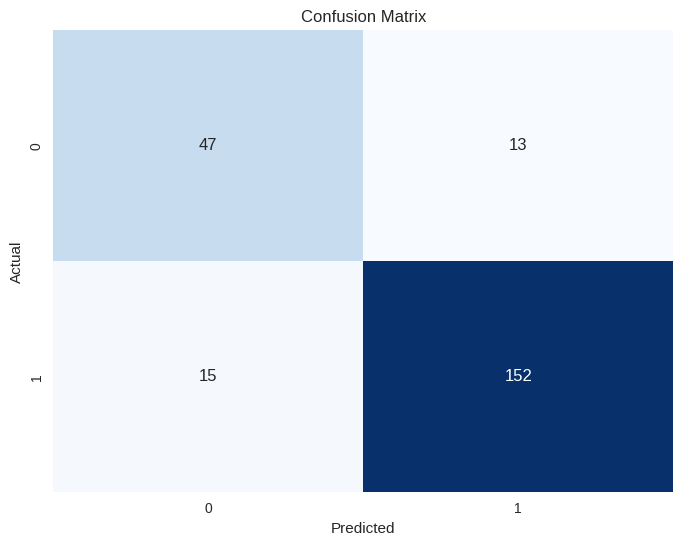

In [ ]:
lr_cr = classification_report(y_test, y_pred_lr)
print("Classification Report:")
print(lr_cr)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

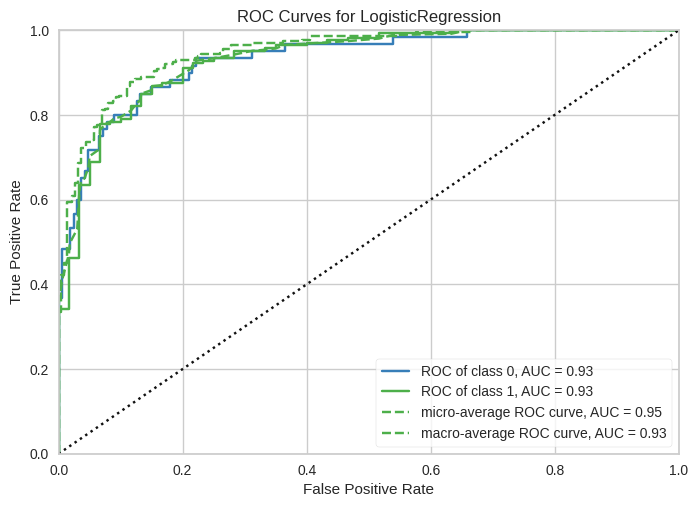

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(lr_model)

set_palette('bold')

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

# 4. A SVM model

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_svc = svm_model.predict(X_test)
y_pred_svc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_train_pred = svm_model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_pred)

In [ ]:
print("Accuracy score of training data:", training_data_accuracy)

Accuracy score of training data: 0.9073724007561437


In [ ]:
X_test_pred = svm_model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_pred)

In [ ]:
print("Accuracy score of test data:", test_data_accuracy)

Accuracy score of test data: 0.8193832599118943


In [ ]:
from sklearn.metrics import accuracy_score
score_svm = round(accuracy_score(y_pred_svc,y_test)*100,2)
print("The accuracy score achieved using the SVM model is: "+str(score_svm)+" %")

The accuracy score achieved using the SVM model is: 81.94 %


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.37      0.52        60
           1       0.81      0.98      0.89       167

    accuracy                           0.82       227
   macro avg       0.85      0.67      0.70       227
weighted avg       0.83      0.82      0.79       227



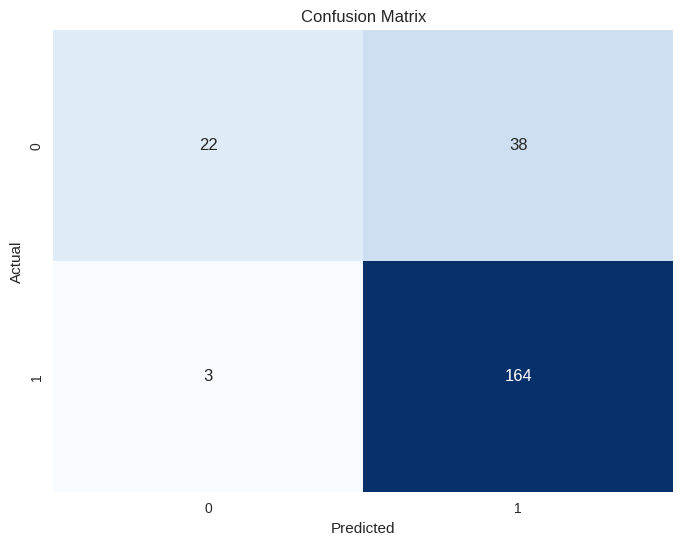

In [ ]:
svc_cr = classification_report(y_test, y_pred_svc)
print("Classification Report:")
print(svc_cr)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. K Nearest Neighbors Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1])

In [ ]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(score_knn)+" %")

The accuracy score achieved using the KNN model is: 83.7 %


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.50      0.62        60
           1       0.84      0.96      0.90       167

    accuracy                           0.84       227
   macro avg       0.83      0.73      0.76       227
weighted avg       0.83      0.84      0.82       227



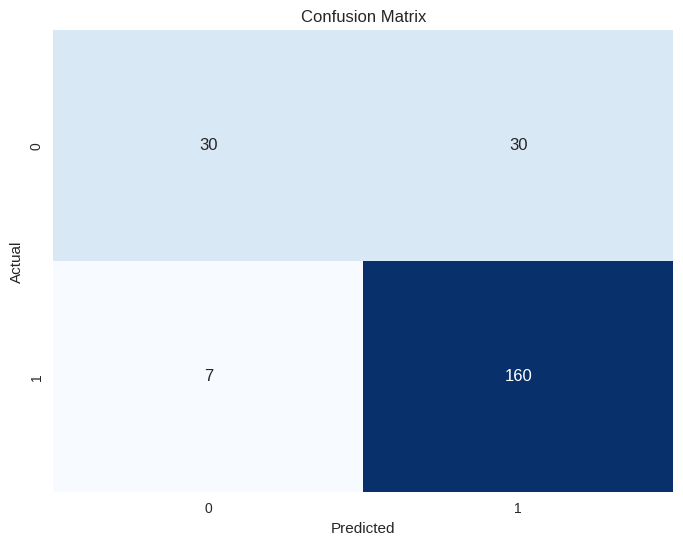

In [ ]:
knn_cr = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(knn_cr)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

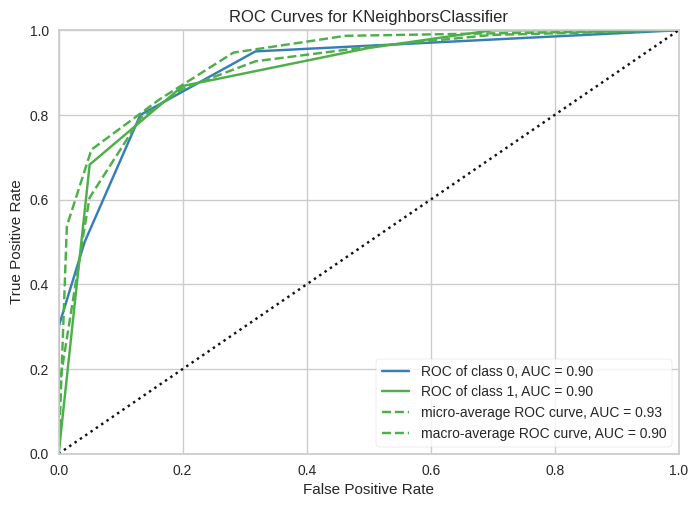

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(knn)

set_palette('bold')

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

# 6. A Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1])

In [ ]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(score_nb)+" %")

The accuracy score achieved using the Naive Bayes model is: 70.48 %


Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.77      0.58        60
           1       0.89      0.68      0.77       167

    accuracy                           0.70       227
   macro avg       0.68      0.72      0.68       227
weighted avg       0.78      0.70      0.72       227



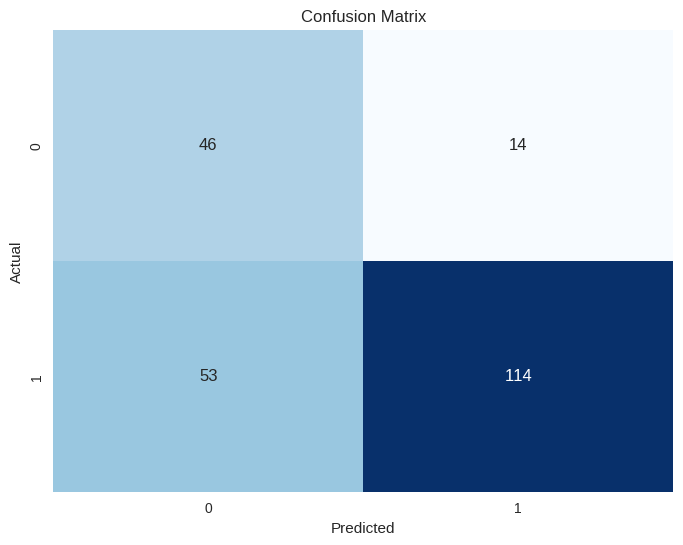

In [ ]:
nb_cr = classification_report(y_test, y_pred_nb)
print("Classification Report:")
print(nb_cr)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

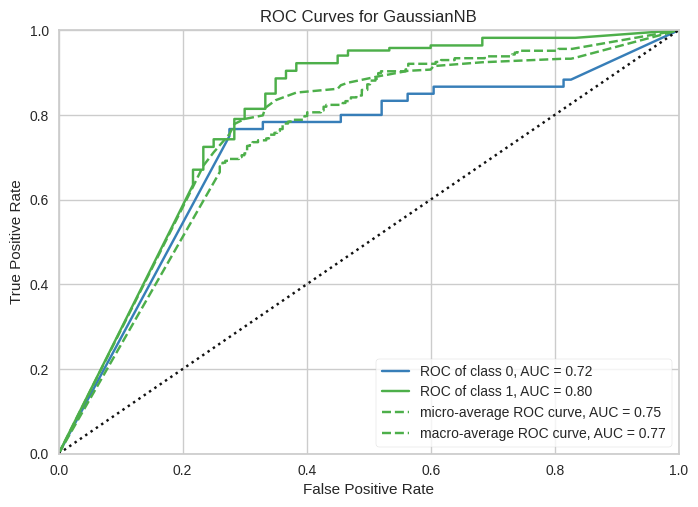

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(nb)

set_palette('bold')

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

# 7. A XGBoost Model

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0])

In [ ]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
print("The accuracy score achieved using the XGBoost model is: "+str(score_xgb)+" %")

The accuracy score achieved using the XGBoost model is: 88.11 %


# Confusion Matrix

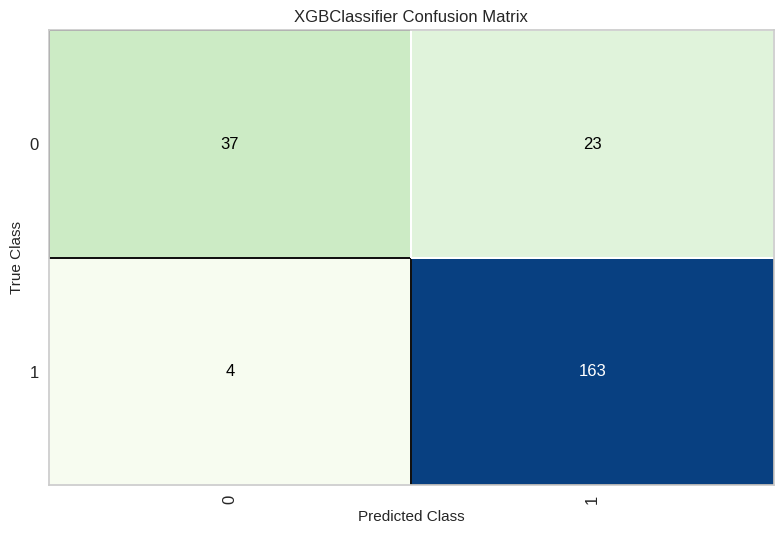

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
xgb_model_cm = ConfusionMatrix(xgb_model, cmap='GnBu',display_labels=["Healthy","Parkinsons"])

xgb_model_cm.fit(X_train, y_train)
xgb_model_cm.score(X_test, y_test)
xgb_model_cm.show()

# Classification Report

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73        60
           1       0.88      0.98      0.92       167

    accuracy                           0.88       227
   macro avg       0.89      0.80      0.83       227
weighted avg       0.88      0.88      0.87       227



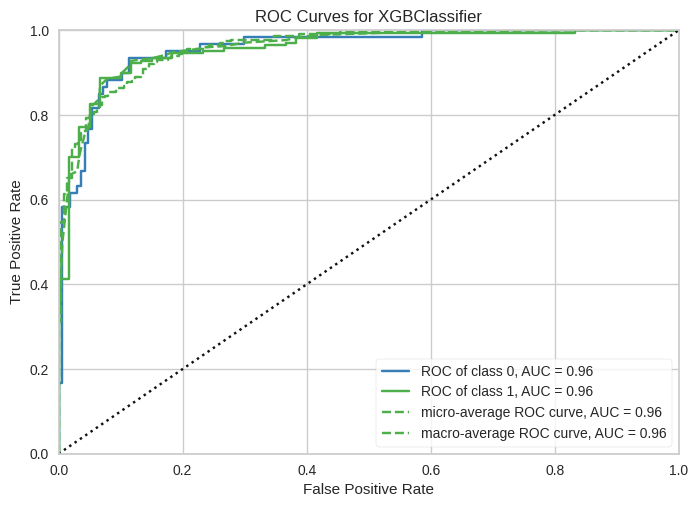

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(xgb_model)

set_palette('bold')

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

# Final Scores

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb] #,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.78 %
The accuracy score achieved using Naive Bayes is: 75.77 %
The accuracy score achieved using Support Vector Machine is: 82.82 %
The accuracy score achieved using K-Nearest Neighbors is: 85.9 %
The accuracy score achieved using Decision Tree is: 81.06 %
The accuracy score achieved using Random Forest is: 86.34 %
The accuracy score achieved using XGBoost is: 86.78 %


# A COMPARISON OF THE ACCURACY OF THE SEVEN MODELS¶

In [ ]:
import pickle
from sklearn.ensemble import AdaBoostClassifier

abc_classifier = AdaBoostClassifier(n_estimators=50)

abc_classifier.fit(X_train,y_train)

abc_model_filename = "ABC_model.pkl"

with open(abc_model_filename,"wb") as file:
  pickle.dump(abc_classifier,file)

In [ ]:
y_pred_abc = abc_classifier.predict(X_test)
y_pred_abc

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0])

In [ ]:
print(accuracy_score(y_test, y_pred_abc))

0.8105726872246696


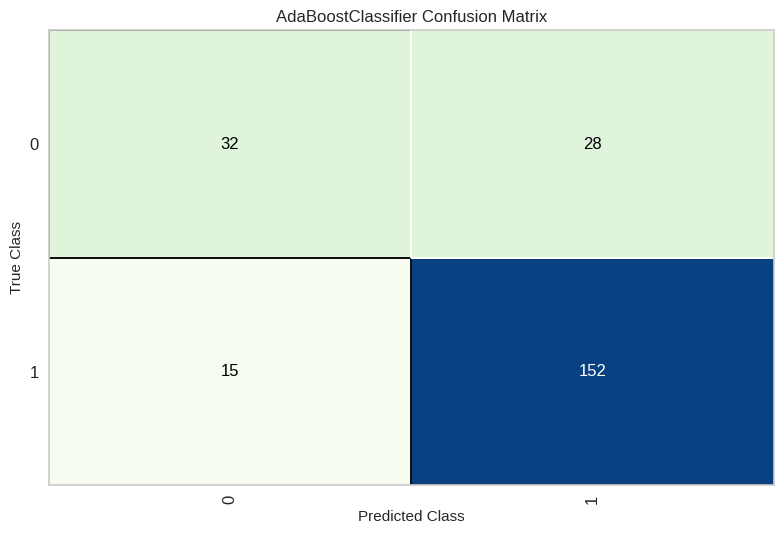

<Axes: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
abc_model_cm = ConfusionMatrix(abc_classifier, cmap='GnBu',display_labels=["Healthy","Parkinsons"])

abc_model_cm.fit(X_train, y_train)
abc_model_cm.score(X_test, y_test)
abc_model_cm.show()

In [ ]:
print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

           0       0.68      0.53      0.60        60
           1       0.84      0.91      0.88       167

    accuracy                           0.81       227
   macro avg       0.76      0.72      0.74       227
weighted avg       0.80      0.81      0.80       227



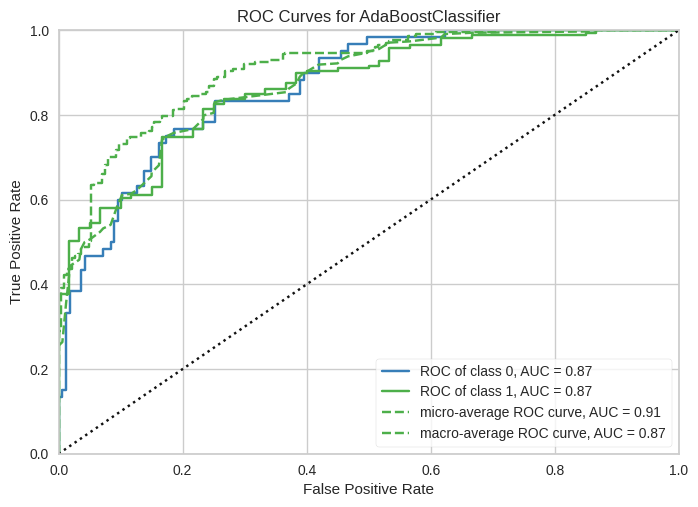

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(abc_classifier)

set_palette('bold')

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
xgb_classifier = xgb.XGBClassifier(max_depth = 6, random_state = 1 )

bc_classifier = BaggingClassifier(estimator = xgb_classifier , n_estimators = 300, n_jobs= -1 , random_state=1)

bc_classifier.fit(X_train,y_train)

bc_model_filename = "BC_model.pkl"

with open(bc_model_filename,"wb") as file:
  pickle.dump(bc_classifier,file)

In [ ]:
y_pred_bc = bc_classifier.predict(X_test)
y_pred_bc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1])

In [ ]:
print(accuracy_score(y_test, y_pred_bc))

0.8502202643171806


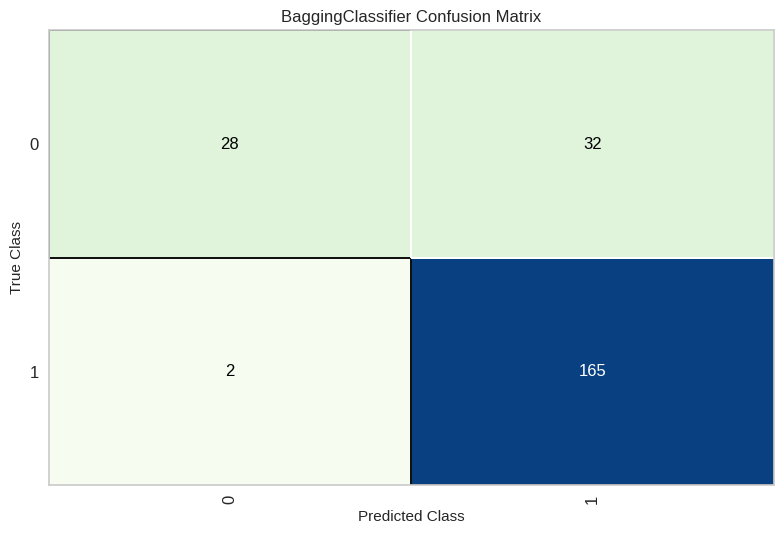

<Axes: title={'center': 'BaggingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
bc_model_cm = ConfusionMatrix(bc_classifier, cmap='GnBu',display_labels=["Healthy","Parkinsons"])

bc_model_cm.fit(X_train, y_train)
bc_model_cm.score(X_test, y_test)
bc_model_cm.show()

In [ ]:
print(classification_report(y_test, y_pred_bc))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        60
           1       0.84      0.99      0.91       167

    accuracy                           0.85       227
   macro avg       0.89      0.73      0.76       227
weighted avg       0.86      0.85      0.83       227



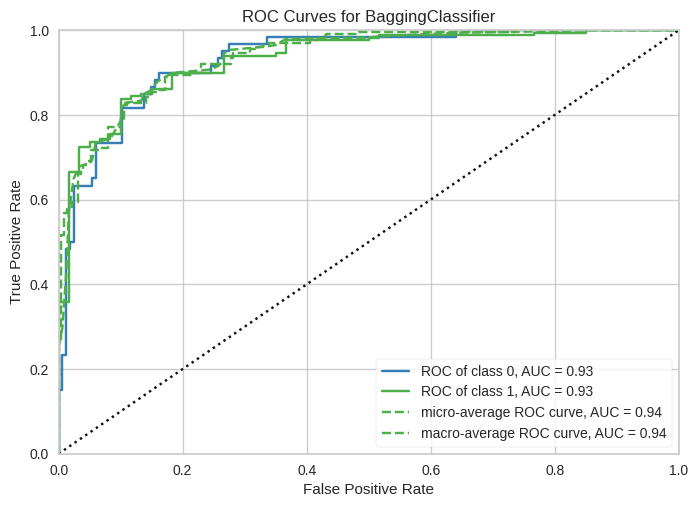

<Axes: title={'center': 'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(bc_classifier)

set_palette('bold')

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import matplotlib.pyplot as plt

results = {}

def metric_printer(classifier):
    y_pred = classifier.predict(X_test)
    classifier_name = classifier.__class__.__name__
    print("Classifier: ", classifier_name)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_test, y_pred)
    print("Precision: ", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall: ", recall)
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)
    print('____________________________________')

    results[classifier_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

In [ ]:
metric_printer(lr_model)
metric_printer(nb)
metric_printer(dt)
metric_printer(svm_model)
metric_printer(rf)
metric_printer(knn)
metric_printer(xgb_model)
metric_printer(abc_classifier)
metric_printer(bc_classifier)

Classifier:  LogisticRegression
Accuracy:  0.8766519823788547
Precision:  0.9212121212121213
Recall:  0.9101796407185628
F1 Score:  0.9156626506024097
____________________________________
Classifier:  GaussianNB
Accuracy:  0.7048458149779736
Precision:  0.890625
Recall:  0.6826347305389222
F1 Score:  0.7728813559322034
____________________________________
Classifier:  DecisionTreeClassifier
Accuracy:  0.8281938325991189
Precision:  0.9
Recall:  0.8622754491017964
F1 Score:  0.8807339449541285
____________________________________
Classifier:  SVC
Accuracy:  0.8193832599118943
Precision:  0.8118811881188119
Recall:  0.9820359281437125
F1 Score:  0.8888888888888888
____________________________________
Classifier:  RandomForestClassifier
Accuracy:  0.8325991189427313
Precision:  0.8274111675126904
Recall:  0.9760479041916168
F1 Score:  0.8956043956043956
____________________________________
Classifier:  KNeighborsClassifier
Accuracy:  0.8370044052863436
Precision:  0.8421052631578947
Recal

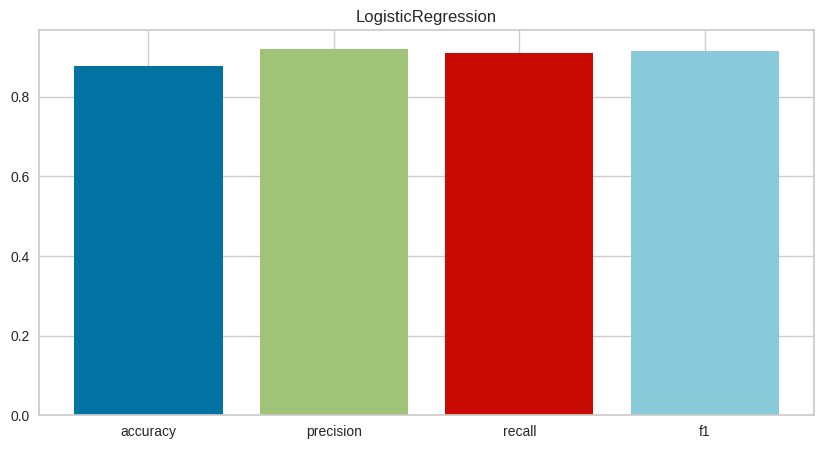

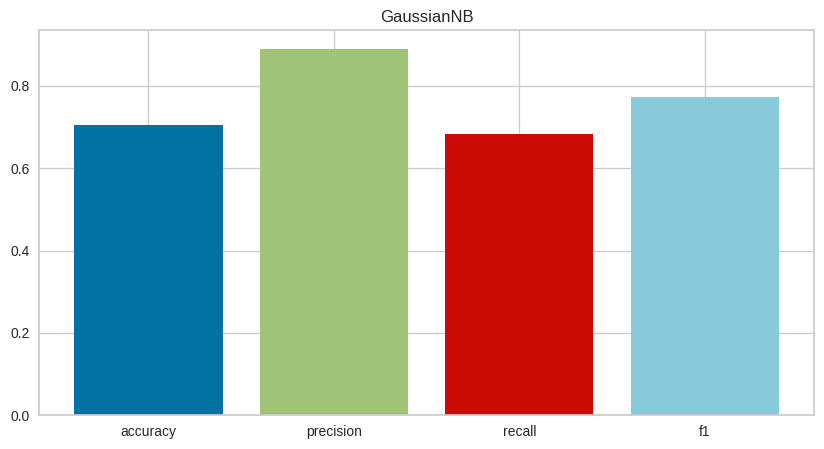

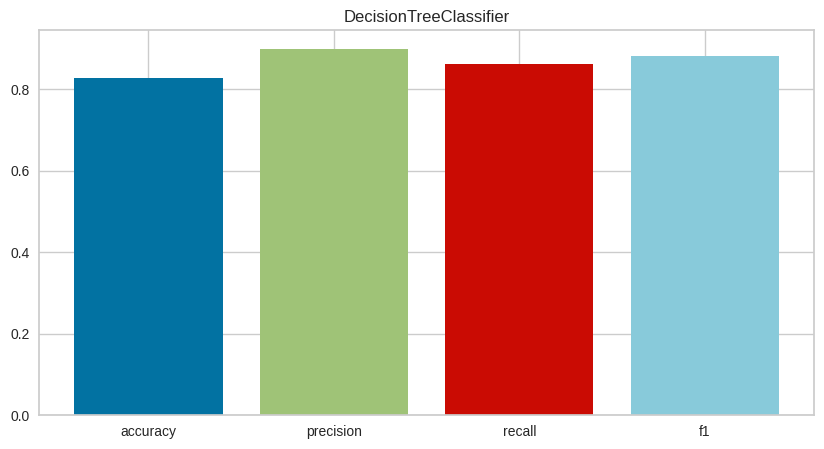

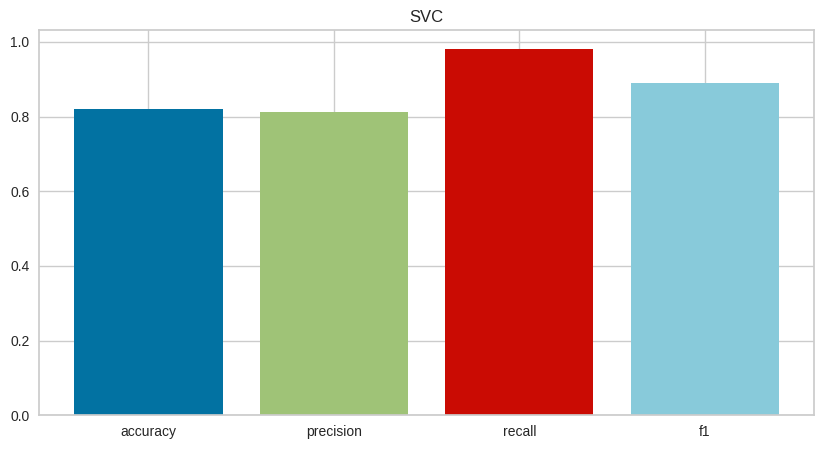

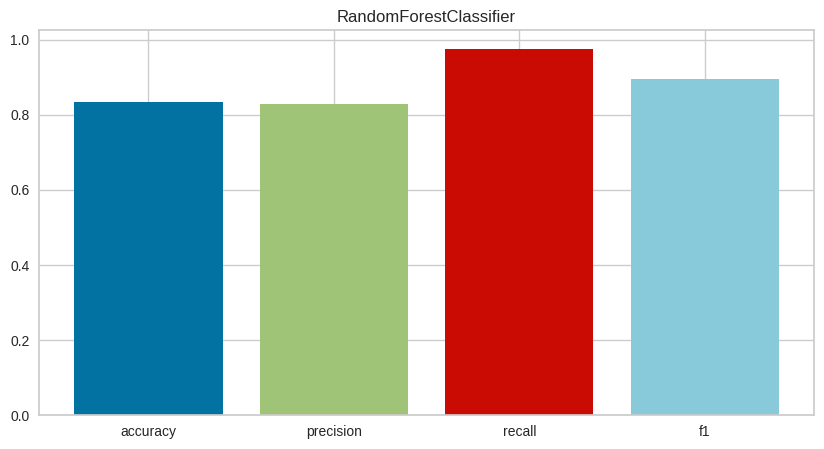

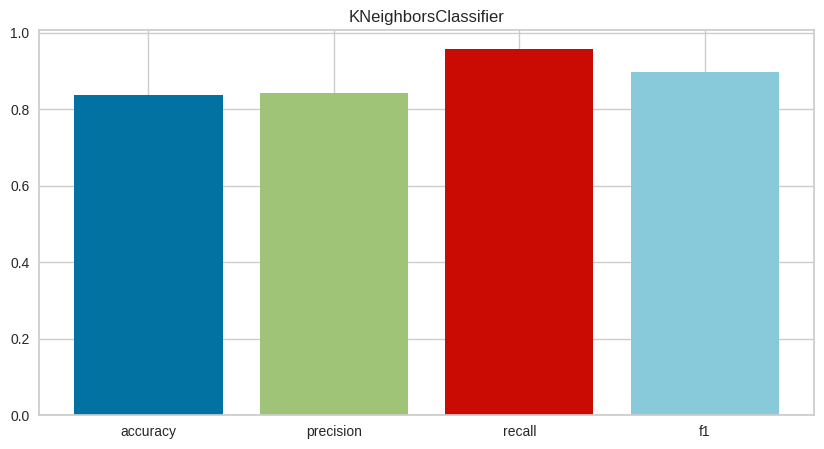

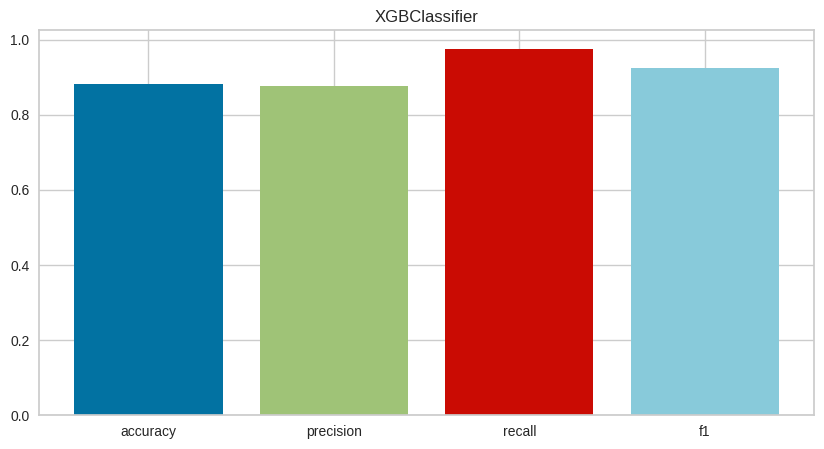

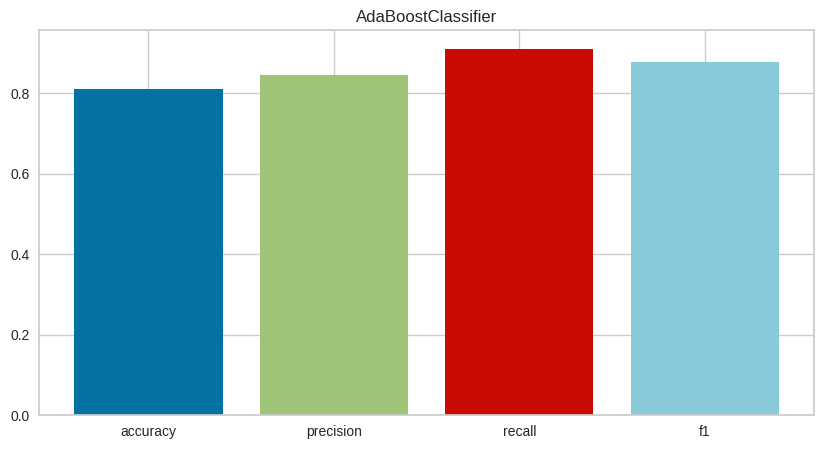

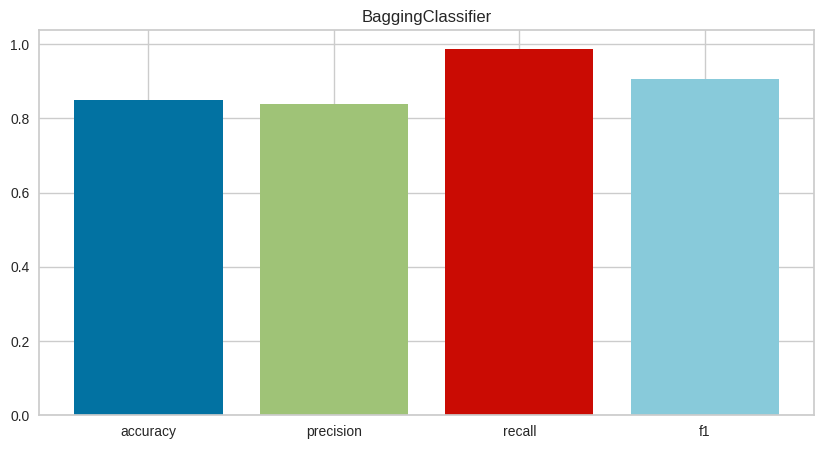

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
def plot_results(results):
    for classifier_name, metrics in results.items():
        plt.figure(figsize=(10,5))
        plt.bar(metrics.keys(), metrics.values(),color=colors)
        plt.title(classifier_name)
        plt.show()

plot_results(results)

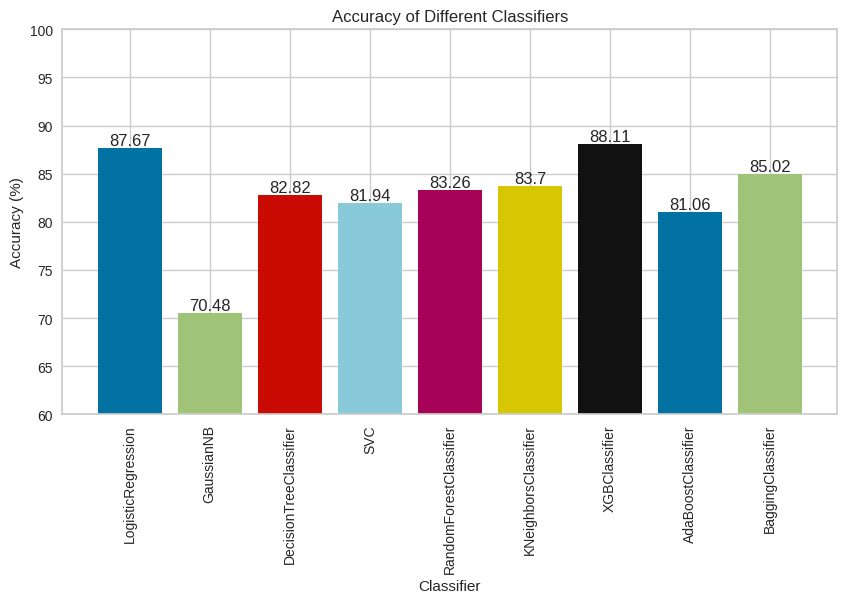

In [ ]:
def plot_results(results):
    plt.figure(figsize=(10,5))

    classifier_names = [name for name in results.keys()]
    accuracies = [metrics['accuracy']*100 for metrics in results.values()]

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    bars = plt.bar(classifier_names, accuracies, color = colors)
    plt.title('Accuracy of Different Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel('Accuracy (%)')
    plt.ylim([60, 100])
    plt.xticks(rotation=90)

    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval,va='bottom',ha='center')

    plt.show()

plot_results(results)

In [ ]:
!pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

Variable Importance Plot - Global Interpretation


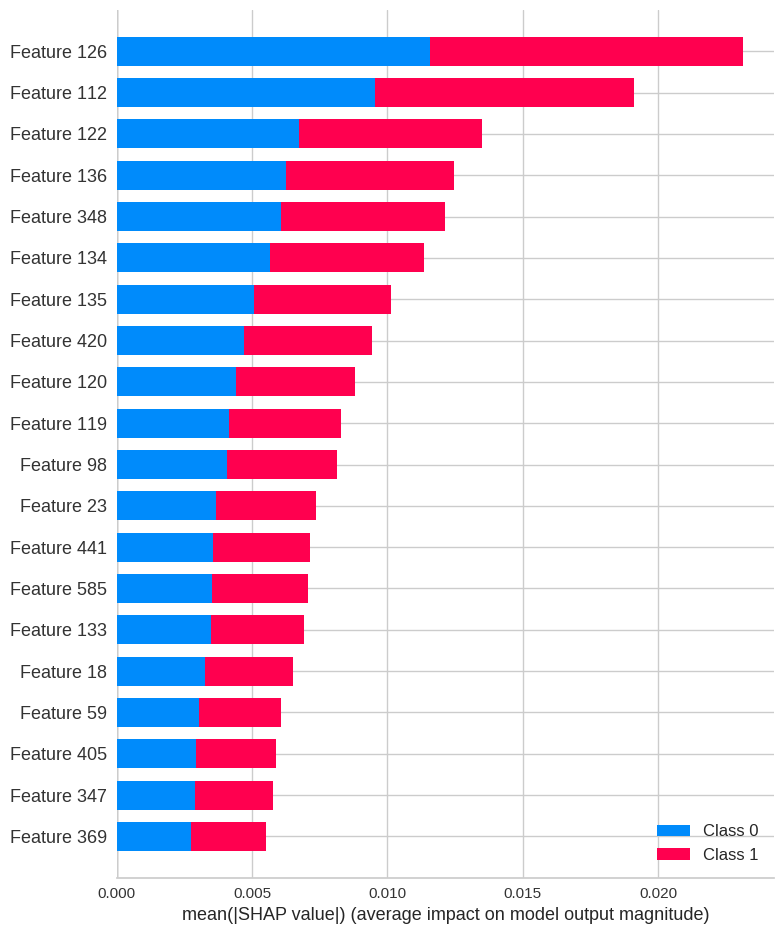

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

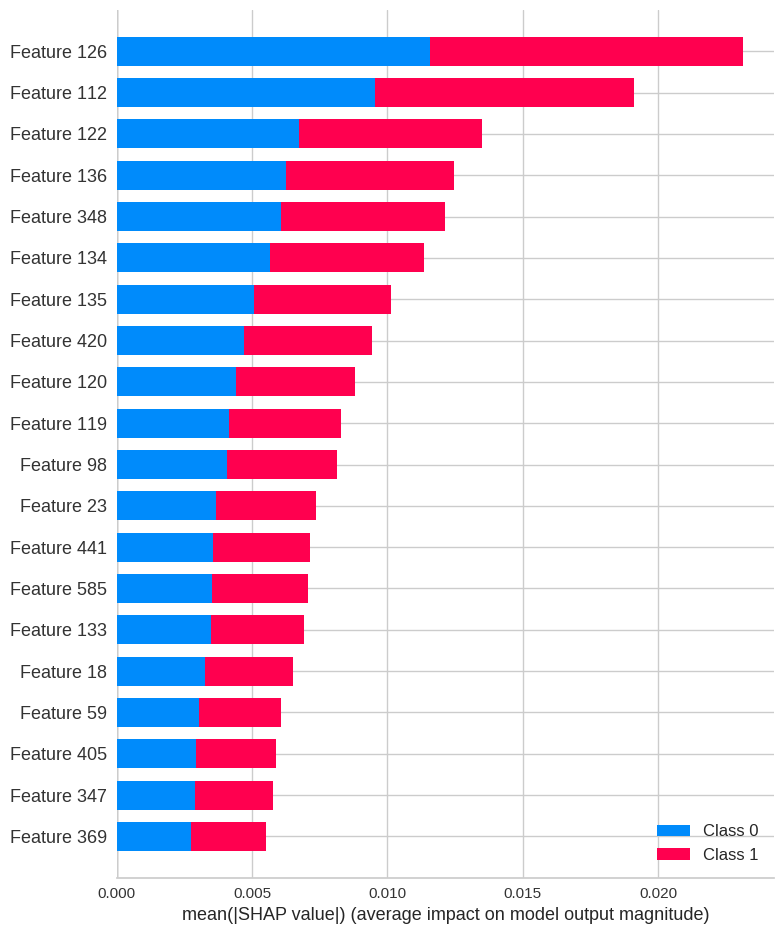

In [ ]:
shap.summary_plot(shap_values, X_test)

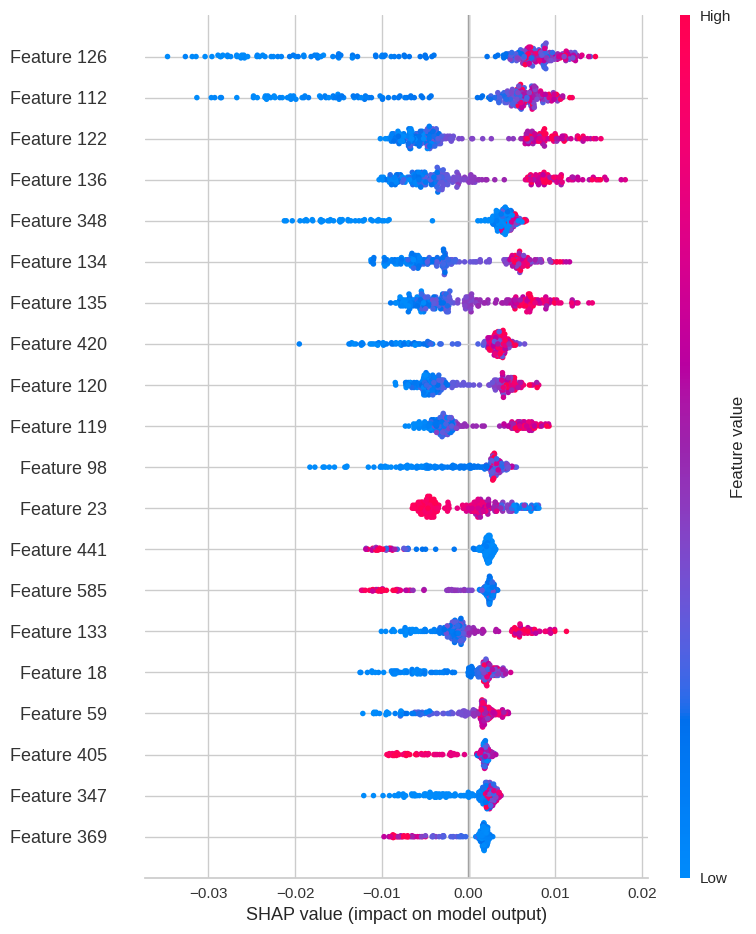

In [ ]:
shap.summary_plot(shap_values[1], X_test)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=1849752a817eb73d8d18d8b26b8f55aa7e5aa98c5a7d1c3d8b03956bfc3e3146
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
